Brain tumor segmentation with K-means++ Clustering and morphology operations

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings

In [10]:
img = cv2.imread('sample_images/image.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

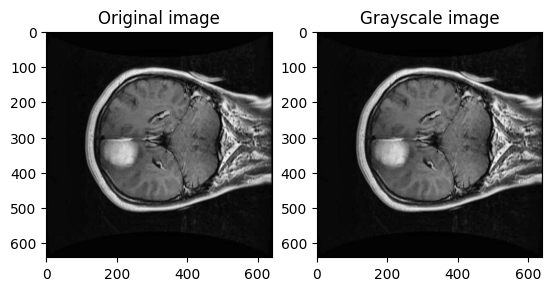

In [11]:
fig, ax = plt.subplots(ncols=2)

ax[0].imshow(img[..., ::-1])  # BGR to RGB
ax[0].set_title('Original image')

ax[1].imshow(gray_img, cmap=plt.cm.gray)
ax[1].set_title('Grayscale image')

plt.show()

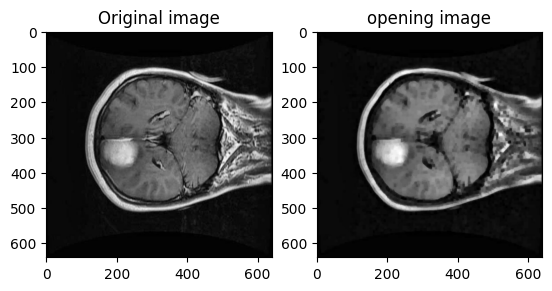

-1

In [12]:
#img = cv2.imread('11.png')
# Python program to demonstrate erosion and
# dilation of images.
import cv2
import numpy as np

# Reading the input image

# Taking a matrix of size 5 as the kernel
kernel = np.ones((5,5), np.uint8)

# The first parameter is the original image,
# kernel is the matrix with which image is
# convolved and third parameter is the number
# of iterations, which will determine how much
# you want to erode/dilate a given image.
img_erosion = cv2.erode(gray_img, kernel, iterations=2)
img_dilation = cv2.dilate(img_erosion, kernel, iterations=1)

#opening= cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations=2)
#cv2.imshow('Input', img)
#cv2.imshow('Erosion', img_erosion)
#cv2.imshow('Dilation', img_dilation)

fig, ax = plt.subplots(ncols=2)

ax[0].imshow(img[..., ::-1])  # BGR to RGB
ax[0].set_title('Original image')

ax[1].imshow(img_dilation, cmap=plt.cm.gray)
ax[1].set_title('opening image')

plt.show()

cv2.waitKey(0)


In [13]:
import cv2
cv2.imwrite('11_prepro.jpg', img_dilation)

True

k-means

In [14]:
img = cv2.imread("11_prepro.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
br, kl = img.shape[:2]
new_array = img.reshape((-1, 3))

In [15]:
print(new_array)

[[3 3 3]
 [3 3 3]
 [3 3 3]
 ...
 [3 3 3]
 [3 3 3]
 [3 3 3]]


In [16]:
import numpy as np
from scipy.spatial import distance

#====================
# INITIAL MEANS
#===================
c = []

# ------------------------
# RANDOMLY SELECT 1ST MEAN
# ------------------------
rows = new_array.shape[0]
temp = np.random.randint(0, rows)  # Ensure the index is within bounds
c.append(new_array[temp])  # SET 1ST CENTRE RANDOMLY FROM DATASET

# --------------------------------------------
# ROULETTE WHEEL BASED SELECTION OF "2ND" MEAN
# --------------------------------------------

# Compute distance squared from 1st centre
D2 = []
for i in range(rows):
    d = distance.euclidean(c[0], new_array[i])
    D2.append(d * d)

# Compute cumulative distance squared
cumul = []
sum_val = sum(D2)
if sum_val == 0:
    raise ValueError("Sum of distances is zero, check your data.")
cumul = [val / sum_val for val in np.cumsum(D2)]

p = np.random.uniform(0, 1)
for i in range(len(cumul)):
    if cumul[i] >= p:
        index = i
        break

c.append(new_array[index])  # SET 2ND MEAN

# --------------------------------------------
# ROULETTE WHEEL BASED SELECTION OF "3RD" MEAN
# --------------------------------------------

# Compute shortest distance squared (from both centres)
D2 = []
for i in range(rows):
    d1 = distance.euclidean(c[0], new_array[i])
    d2 = distance.euclidean(c[1], new_array[i])
    D2.append(min(d1 * d1, d2 * d2))

# Compute cumulative distance squared
cumul = []
sum_val = sum(D2)
if sum_val == 0:
    raise ValueError("Sum of distances is zero, check your data.")
cumul = [val / sum_val for val in np.cumsum(D2)]

p = np.random.uniform(0, 1)
for i in range(len(cumul)):
    if cumul[i] >= p:
        index = i
        break

c.append(new_array[index])  # SET 3RD MEAN

# --------------------------------------------
# ROULETTE WHEEL BASED SELECTION OF "4TH" MEAN
# --------------------------------------------

# Compute shortest distance squared (from all three centres)
D2 = []
for i in range(rows):
    d1 = distance.euclidean(c[0], new_array[i])
    d2 = distance.euclidean(c[1], new_array[i])
    d3 = distance.euclidean(c[2], new_array[i])
    D2.append(min(d1 * d1, d2 * d2, d3 * d3))

# Compute cumulative distance squared
cumul = []
sum_val = sum(D2)
if sum_val == 0:
    raise ValueError("Sum of distances is zero, check your data.")
cumul = [val / sum_val for val in np.cumsum(D2)]

p = np.random.uniform(0, 1)
for i in range(len(cumul)):
    if cumul[i] >= p:
        index = i
        break

c.append(new_array[index])  # SET 4TH MEAN

# --------------------------------------------
# ROULETTE WHEEL BASED SELECTION OF "5TH" MEAN
# --------------------------------------------

# Compute shortest distance squared (from all four centres)
D2 = []
for i in range(rows):
    d1 = distance.euclidean(c[0], new_array[i])
    d2 = distance.euclidean(c[1], new_array[i])
    d3 = distance.euclidean(c[2], new_array[i])
    d4 = distance.euclidean(c[3], new_array[i])
    D2.append(min(d1 * d1, d2 * d2, d3 * d3, d4 * d4))

# Compute cumulative distance squared
cumul = []
sum_val = sum(D2)
if sum_val == 0:
    raise ValueError("Sum of distances is zero, check your data.")
cumul = [val / sum_val for val in np.cumsum(D2)]

p = np.random.uniform(0, 1)
for i in range(len(cumul)):
    if cumul[i] >= p:
        index = i
        break

c.append(new_array[index])  # SET 5TH MEAN


In [17]:
# WE NOW HAVE 5 MEANS SELECTED VIA CAREFUL SEEDING
#c=[l.tolist() for l in c]
c=np.asarray(c)
c

array([[ 91,  91,  91],
       [117, 117, 117],
       [ 14,  14,  14],
       [208, 208, 208],
       [ 15,  15,  15]], dtype=uint8)

In [18]:
#center = np.uint8(c*255)
#center

In [19]:
#type(center)

In [20]:
#center = np.asarray(center)
c = c.astype("float") / 255
c

array([[0.35686275, 0.35686275, 0.35686275],
       [0.45882353, 0.45882353, 0.45882353],
       [0.05490196, 0.05490196, 0.05490196],
       [0.81568627, 0.81568627, 0.81568627],
       [0.05882353, 0.05882353, 0.05882353]])

KM

In [ ]:

def kmeans(data, k, max_iter = 100):
    m = len(data[0])
    n = len(data)
    classes = np.zeros(n)
    center = c
    distance = np.zeros([k, n])
    for iter in range(max_iter):
        for i in range(n):
            for j in range(k):
                distance[j, i] = 0 #distance
                for p in range(m):
                    distance[j, i] += (center[j, p] - data[i, p])**2
                distance[j, i] = np.sqrt(distance[j, i]) #distance[j, i] = np.linalg.norm(center[j] - data[i])
            classes[i] = np.argmin(distance[:, i])
        print(classes)
        for j in range(k):
            new_center = 0
            num = 0
            for i in range(n):
                if classes[i] == j:
                    new_center += data[i]
                    num += 1
            if num==0:
                center[j] = new_center
            else:
                center[j] = new_center/num
    return classes, center


img = cv2.imread("11_prepro.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
br, kl = img.shape[:2]
data = img.reshape((-1, 3))
data = data.astype("float") / 255 #iki
data_cluster, center = kmeans(data, 3, max_iter=30)
img_cluster = np.reshape(data_cluster, (br, kl))
center = np.uint8(center*255)
kmeans_img = np.zeros_like(img)
for i in range(br):
    for j in range(kl):
        s = img_cluster[i, j]
        kmeans_img[i, j] = center[int(s)]
#cv2.imshow("glioma1.jpg", img)
#cv2.imshow('citra kmeans', np.uint8(kmeans_img))
#cv2.waitKey(0)

[2. 2. 2. ... 2. 2. 2.]
[2. 2. 2. ... 2. 2. 2.]
[2. 2. 2. ... 2. 2. 2.]
[2. 2. 2. ... 2. 2. 2.]
[2. 2. 2. ... 2. 2. 2.]
[2. 2. 2. ... 2. 2. 2.]
[2. 2. 2. ... 2. 2. 2.]
[2. 2. 2. ... 2. 2. 2.]
[2. 2. 2. ... 2. 2. 2.]
[2. 2. 2. ... 2. 2. 2.]
[2. 2. 2. ... 2. 2. 2.]
[2. 2. 2. ... 2. 2. 2.]
[2. 2. 2. ... 2. 2. 2.]
[2. 2. 2. ... 2. 2. 2.]
[2. 2. 2. ... 2. 2. 2.]
[2. 2. 2. ... 2. 2. 2.]
[2. 2. 2. ... 2. 2. 2.]
[2. 2. 2. ... 2. 2. 2.]
[2. 2. 2. ... 2. 2. 2.]
[2. 2. 2. ... 2. 2. 2.]
[2. 2. 2. ... 2. 2. 2.]
[2. 2. 2. ... 2. 2. 2.]
[2. 2. 2. ... 2. 2. 2.]
[2. 2. 2. ... 2. 2. 2.]
[2. 2. 2. ... 2. 2. 2.]
[2. 2. 2. ... 2. 2. 2.]
[2. 2. 2. ... 2. 2. 2.]
[2. 2. 2. ... 2. 2. 2.]
[2. 2. 2. ... 2. 2. 2.]
[2. 2. 2. ... 2. 2. 2.]


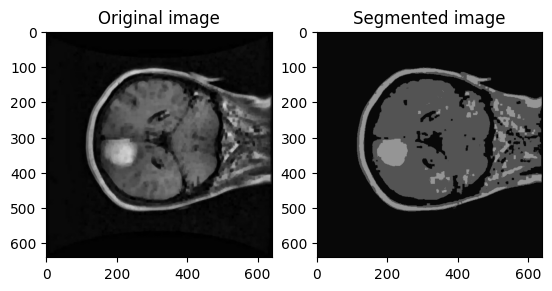

In [22]:
fig, ax = plt.subplots(ncols=2)

ax[0].imshow(img[..., ::-1])  # BGR to RGB
ax[0].set_title('Original image')

ax[1].imshow(np.uint8(kmeans_img), cmap=plt.cm.gray)
ax[1].set_title('Segmented image')

plt.show()

colormap

In [23]:
import cv2
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
#labels=img_cluster.labels_
label2D = img_cluster.reshape(br, kl) #kmeans_img img_cluster
print(label2D.shape)

(640, 640)


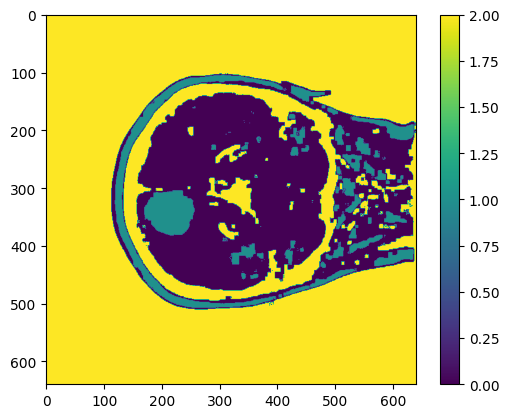

In [24]:
plt.imshow(label2D)
plt.colorbar()
plt.show()

In [25]:
import cv2
cv2.imwrite('11_colormap.jpg',kmeans_img)

True

In [26]:
from PIL import Image

In [27]:
# fungsi citra biner
def citra_biner(nilai_ambang):

    CITRA_GRAYSCALE = Image.open('11_colormap.jpg').convert('L')
    PIXEL_GRAYSCALE = CITRA_GRAYSCALE.load()

    ukuran_horizontal = CITRA_GRAYSCALE.size[0]
    ukuran_vertikal = CITRA_GRAYSCALE.size[1]

    for x in range(ukuran_horizontal):
        for y in range(ukuran_vertikal):
            if PIXEL_GRAYSCALE[x, y] < nilai_ambang:
                PIXEL_GRAYSCALE[x, y] = 0
            else:
                PIXEL_GRAYSCALE[x, y] = 255

    nama_setelah_disave = 'gambar_biner_' + str(nilai_ambang) + '.jpg'
    CITRA_GRAYSCALE.save(nama_setelah_disave)

In [28]:
citra_biner(100)

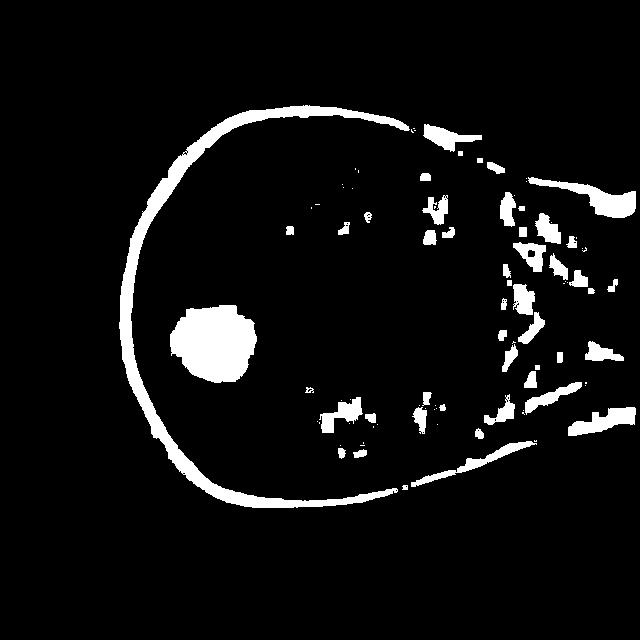

In [29]:
Image.open('gambar_biner_100.jpg')

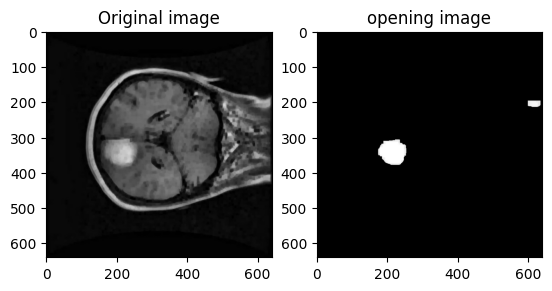

-1

In [30]:
gbr = cv2.imread("gambar_biner_100.jpg")
# Python program to demonstrate erosion and
# dilation of images.
import cv2
import numpy as np

# Reading the input image

# Taking a matrix of size 5 as the kernel
kernel = np.ones((5,5), np.uint8)

# The first parameter is the original image,
# kernel is the matrix with which image is
# convolved and third parameter is the number
# of iterations, which will determine how much
# you want to erode/dilate a given image.
img_erosion = cv2.erode(gbr, kernel, iterations=4)
img_dilation = cv2.dilate(img_erosion, kernel, iterations=3)

#opening= cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations=2)
#cv2.imshow('Input', img)
#cv2.imshow('Erosion', img_erosion)
#cv2.imshow('Dilation', img_dilation)

fig, ax = plt.subplots(ncols=2)

ax[0].imshow(img[..., ::-1])  # BGR to RGB
ax[0].set_title('Original image')

ax[1].imshow(img_dilation, cmap=plt.cm.gray)
ax[1].set_title('opening image')

plt.show()

cv2.waitKey(0)


In [31]:
import cv2
cv2.imwrite('morf_11.jpg',img_dilation)

True

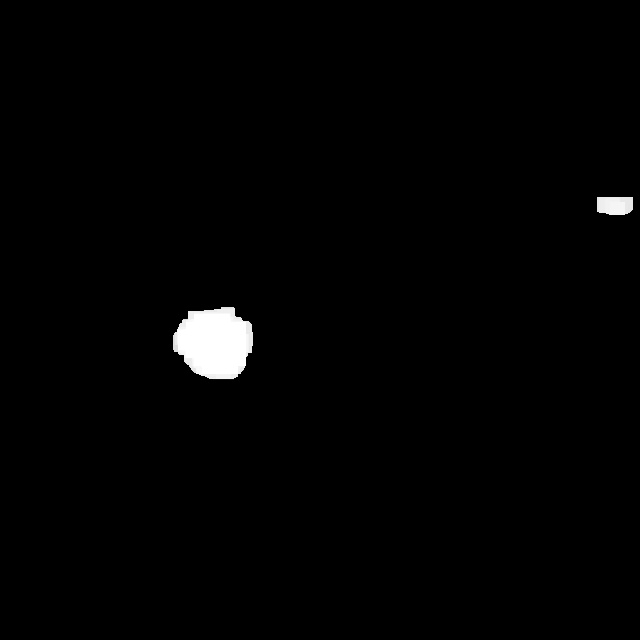

In [32]:
Image.open('morf_11.jpg')